In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [58]:
mcd = pd.read_csv('mcdonalds.csv')

# View column names
mcd.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [3]:
mcd.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
mcd.shape

(1453, 15)

In [5]:
# Select the first 11 columns from the dataset
MD_x = mcd.iloc[:, 0:11].values

# Convert categorical "Yes" to 1 and everything else to 0
MD_x = np.where(MD_x == "Yes", 1, 0)

# Calculate the column means and round them to 2 decimal places
col_means = np.round(np.mean(MD_x, axis=0), 2)

# Display the result
col_means

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [6]:
from sklearn.decomposition import PCA

# Perform PCA on the dataset
pca = PCA()
MD_pca = pca.fit(MD_x)

# Summary of PCA (explained variance ratio for each component)
explained_variance = np.round(pca.explained_variance_ratio_, 2)

# Cumulative variance explained by the principal components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Display the explained variance and cumulative variance
explained_variance, cumulative_variance

(array([0.3 , 0.19, 0.13, 0.08, 0.06, 0.05, 0.04, 0.04, 0.04, 0.03, 0.03]),
 array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
        0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
        1.        ]))

In [7]:
# Print the explained variance with 1 decimal point
explained_variance = np.round(pca.explained_variance_, 1)
explained_variance_ratio = np.round(pca.explained_variance_ratio_, 1)

# Display the explained variance and variance ratios
print("Explained Variance (rounded to 1 decimal):", explained_variance)
print("Explained Variance Ratio (rounded to 1 decimal):", explained_variance_ratio)


Explained Variance (rounded to 1 decimal): [0.6 0.4 0.3 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Explained Variance Ratio (rounded to 1 decimal): [0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]


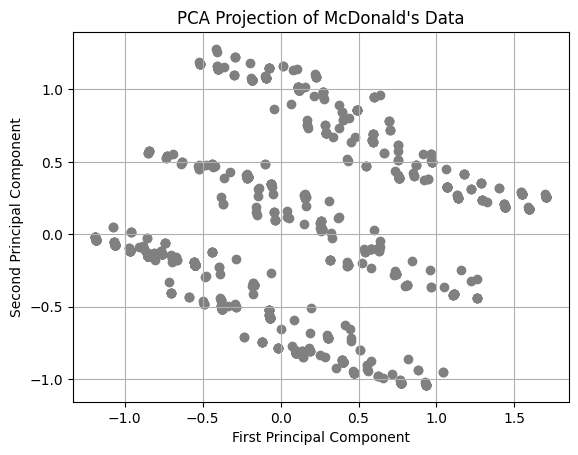

Principal Component Loadings (projection of variables):
[[-0.48 -0.16 -0.01  0.12  0.3  -0.11 -0.34 -0.47  0.33 -0.21  0.37]
 [ 0.36  0.02  0.02 -0.03 -0.06 -0.09 -0.61  0.31  0.6   0.08 -0.14]
 [-0.3  -0.06 -0.04 -0.32 -0.8  -0.06 -0.15 -0.29  0.02  0.19 -0.09]
 [ 0.06 -0.14  0.2  -0.35  0.25 -0.1   0.12 -0.    0.07  0.76  0.37]
 [-0.31  0.28  0.07 -0.07  0.36  0.11 -0.13 -0.21 -0.    0.29 -0.73]
 [ 0.17 -0.35 -0.36 -0.41  0.21 -0.59 -0.1  -0.08 -0.26 -0.18 -0.21]
 [-0.28 -0.06  0.71 -0.39  0.04 -0.09 -0.04  0.36 -0.07 -0.35 -0.03]
 [ 0.01 -0.11  0.38  0.59 -0.14 -0.63  0.14 -0.07  0.03  0.18 -0.17]
 [ 0.57 -0.02  0.4  -0.16 -0.    0.17  0.08 -0.64  0.07 -0.19 -0.07]
 [-0.11 -0.67 -0.08 -0.01  0.01  0.24  0.43  0.08  0.45 -0.04 -0.29]
 [ 0.05 -0.54  0.14  0.25  0.    0.34 -0.49  0.02 -0.49  0.16 -0.04]]


In [8]:
import matplotlib.pyplot as plt

# Predict the principal components
MD_pca_transformed = pca.transform(MD_x)

# Plot the first two principal components
plt.scatter(MD_pca_transformed[:, 0], MD_pca_transformed[:, 1], color='grey')
plt.title('PCA Projection of McDonald\'s Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()

components = np.round(pca.components_, 2)

print("Principal Component Loadings (projection of variables):")
print(components)


In [9]:
from sklearn.cluster import KMeans

# Set the seed for reproducibility
np.random.seed(1234)

# Define the range for number of clusters (2 to 8)
cluster_range = range(2, 9)

# Dictionary to store KMeans results for different cluster sizes
kmeans_results = {}

# Run KMeans for each cluster size and store the results
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    kmeans_results[k] = kmeans

# Store the final result for k=28 (which corresponds to stepFlexclust in R)
MD_km28 = kmeans_results[4]  # Adjust this based on your clustering needs

# Display the cluster labels for inspection
MD_km28.labels_


array([1, 3, 3, ..., 3, 0, 2])

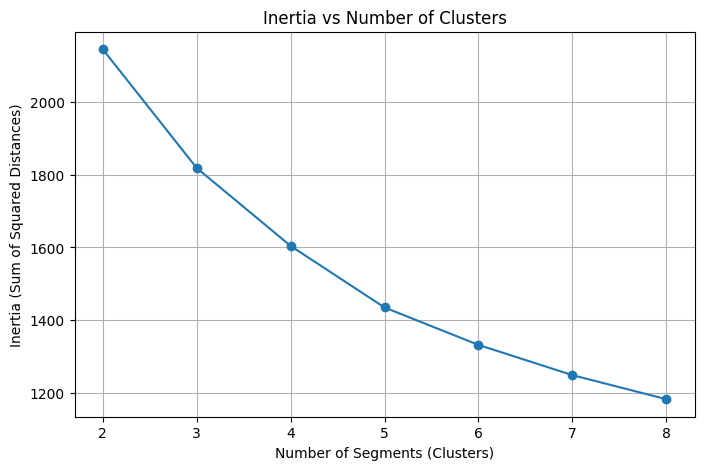

In [10]:
# Prepare a list to store the inertia values
inertia_values = []

# Calculate inertia for each cluster size (2 to 8)
for k in cluster_range:
    inertia_values.append(kmeans_results[k].inertia_)

# Plotting the inertia values against the number of clusters
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(cluster_range)
plt.grid()
plt.show()


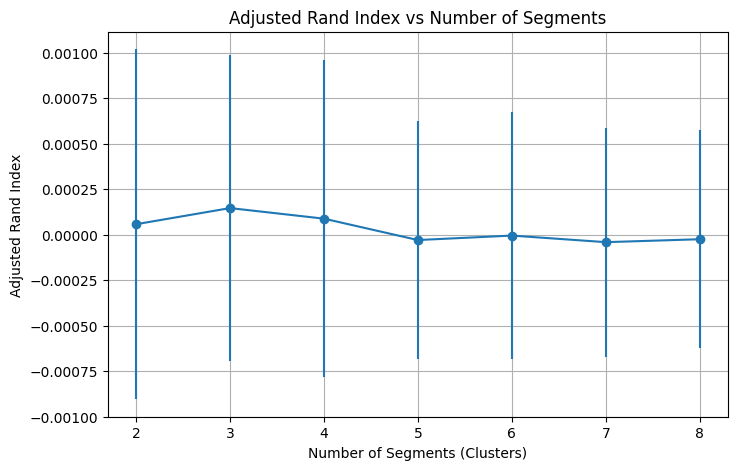

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

# Set the seed for reproducibility
np.random.seed(1234)


# Define parameters for bootstrapping
n_boot = 100
n_reps = 10
cluster_range = range(2, 9)

# Dictionary to store the results for bootstrapping
bootstrap_results = {k: [] for k in cluster_range}
ari_results = {k: [] for k in cluster_range}

# Bootstrapping for cluster sizes
for _ in range(n_boot):
    # Create a bootstrap sample
    boot_sample = resample(MD_x, replace=True)
    
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, n_init=n_reps, random_state=1234)
        kmeans.fit(boot_sample)
        labels = kmeans.labels_
        
        # Compute the Adjusted Rand Index
        ari = adjusted_rand_score(true_labels, labels)
        ari_results[k].append(ari)

# Calculate mean and standard deviation of ARI for each cluster size
ari_means = {k: np.mean(ari_results[k]) for k in cluster_range}
ari_stds = {k: np.std(ari_results[k]) for k in cluster_range}

# Plotting the Adjusted Rand Index against the number of clusters
plt.figure(figsize=(8, 5))
plt.errorbar(list(cluster_range), list(ari_means.values()), yerr=list(ari_stds.values()), marker='o', linestyle='-')
plt.title('Adjusted Rand Index vs Number of Segments')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Adjusted Rand Index')
plt.xticks(cluster_range)
plt.grid()
plt.show()


In [22]:
# Set the seed for reproducibility
np.random.seed(1234)


# Dictionary to store KMeans models
kmeans_results = {}

# Fit KMeans for different cluster sizes and store in the dictionary
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    kmeans_results[n_clusters] = kmeans  # Store the KMeans model

# Now you can access the KMeans model for 4 clusters
MD_k4 = kmeans_results[4]

# If you need to get the labels for cluster size 4
labels_k4 = MD_k4.labels_

In [23]:
from sklearn.metrics import pairwise_distances

cluster_centers = MD_k4.cluster_centers_

distances = pairwise_distances(MD_x, cluster_centers)

membership_probabilities = 1 / (distances + 1e-10)

# Normalize the probabilities to sum to 1 for each data point
membership_probabilities /= membership_probabilities.sum(axis=1, keepdims=True)

# Now, membership_probabilities holds the soft clustering results
MD_r4 = membership_probabilities  # This is analogous to MD.r4 in R

# To display or further analyze MD_r4
print(MD_r4)


[[0.21216908 0.3047436  0.26095309 0.22213424]
 [0.28789473 0.21195552 0.18820936 0.31194039]
 [0.22323684 0.22755419 0.25639581 0.29281316]
 ...
 [0.20303933 0.15580841 0.17387672 0.46727554]
 [0.38523874 0.22001673 0.16640353 0.22834101]
 [0.15782911 0.21101362 0.42177506 0.20938221]]


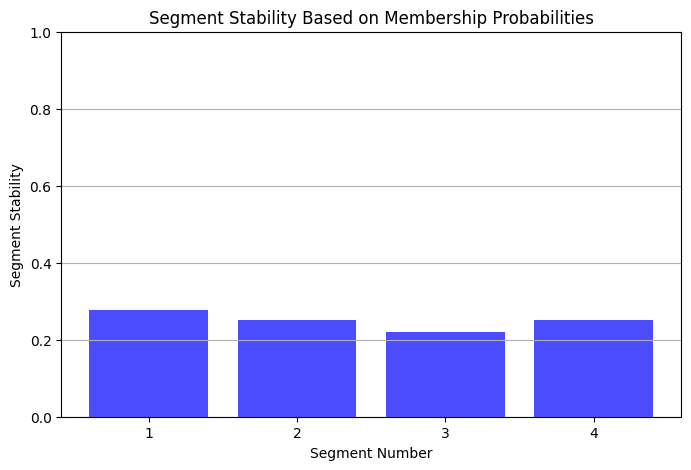

In [24]:
average_stability = MD_r4.mean(axis=0)  # Average across all data points for each segment

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(average_stability) + 1), average_stability, color='blue', alpha=0.7)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment Stability Based on Membership Probabilities")
plt.xticks(range(1, len(average_stability) + 1))  # Set x-ticks to segment numbers
plt.grid(axis='y')
plt.show()


In [26]:
from sklearn.mixture import GaussianMixture

# Set the seed for reproducibility
np.random.seed(1234)

# Initialize a dictionary to store results for each cluster size
mixture_models = {}

for n_components in range(2, 9):
    # Create a Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components, random_state=1234)
    gmm.fit(MD_x)  # Fit the model to your data
    mixture_models[n_components] = gmm  # Store the fitted model

for k in range(2, 9):
    print(f"Model for {k} components:")
    print("Weights:", mixture_models[k].weights_)
    print("Means:", mixture_models[k].means_)
    print("Covariances:", mixture_models[k].covariances_)


Model for 2 components:
Weights: [0.32209222 0.67790778]
Means: [[0.27991453 0.71367521 0.09615385 0.90384615 0.72222222 0.69017094
  0.45726496 0.36538462 0.52564103 0.10683761 0.7542735 ]
 [0.6822335  1.         0.09238579 0.84974619 0.43350254 1.
  0.66598985 0.77664975 0.27817259 0.24263959 0.        ]]
Covariances: [[[ 2.01563386e-01  3.52746731e-02  1.79569362e-02 -1.36834319e-02
   -2.05365622e-02 -3.50692161e-02  1.51672876e-02  1.45586785e-01
    4.57484110e-03  4.06074220e-02 -7.22432246e-02]
  [ 3.52746731e-02  2.04343903e-01  8.30046022e-03  2.16140697e-02
    8.07217472e-03  5.30535470e-03  2.62254365e-02  4.47896121e-02
   -2.25728687e-02  9.22273357e-03  1.51124990e-02]
  [ 1.79569362e-02  8.30046022e-03  8.69092840e-02  2.83530572e-03
    7.47863248e-03  6.28698224e-03  7.31426693e-03  1.82856673e-02
    5.01314925e-03  2.17784352e-02  1.08070349e-02]
  [-1.36834319e-02  2.16140697e-02  2.83530572e-03  8.69092840e-02
    5.02136752e-02  2.57642998e-02  9.77975017e-03 -1

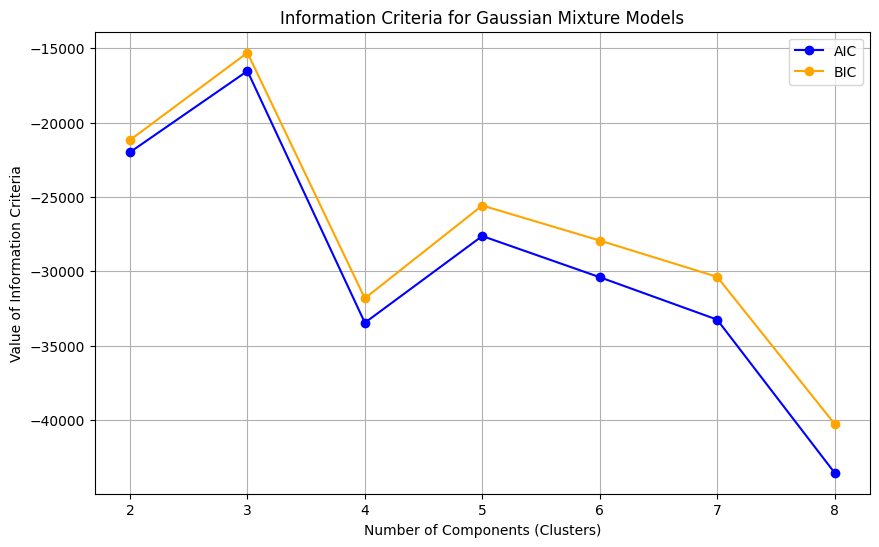

In [27]:
np.random.seed(1234)

# Initialize lists to store AIC and BIC values
aic_values = []
bic_values = []

# Fit mixture models for cluster sizes from 2 to 8
for n_components in range(2, 9):
    # Create and fit the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components, random_state=1234)
    gmm.fit(MD_x)
    
    # Store the AIC and BIC values
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), aic_values, marker='o', label='AIC', color='blue')
plt.plot(range(2, 9), bic_values, marker='o', label='BIC', color='orange')

# Set labels and title
plt.title('Information Criteria for Gaussian Mixture Models')
plt.xlabel('Number of Components (Clusters)')
plt.ylabel('Value of Information Criteria')
plt.xticks(range(2, 9))  # Set x-ticks to cluster sizes
plt.legend()
plt.grid()
plt.show()


In [35]:
# Create a contingency table to compare clusters
contingency_table = pd.crosstab(kmeans_clusters, gmm_clusters, rownames=['KMeans'], colnames=['GMM'])
print(contingency_table)


GMM      0    1   2    3
KMeans                  
0       20  302   0  191
1        2  116  59  189
2       90   30  14  108
3       17  150   1  164


In [30]:
log_likelihood = MD_m4a.score(MD_x) * MD_x.shape[0]  # Total log-likelihood
print(f"Log-Likelihood: {log_likelihood}")


Log-Likelihood: 17040.598827012964


In [33]:
log_likelihood_m4 = MD_m4.score(MD_x) * MD_x.shape[0]  # Total log-likelihood
print(f"Log-Likelihood (MD.m4): {log_likelihood_m4}")

Log-Likelihood (MD.m4): 17040.598827012964


In [41]:
# Count occurrences of each unique value in the 'Like' column and reverse the order
like_counts = mcd['Like'].value_counts().sort_index(ascending=False)

# Print the reversed counts (similar to R's rev(table()))
print("Counts for 'Like':")
print(like_counts)

Counts for 'Like':
Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


In [60]:
import pandas as pd
import re

# Function to extract numeric rating from the 'Like' text
def extract_rating(text):
    match = re.search(r'[-+]?\d+', text)  # Find the first number in the string
    if match:
        return int(match.group())  # Return the numeric value as integer
    return None  # Return None if no match found

# Extract numeric ratings from the 'Like' column
mcd['Like'] = mcd['Like'].apply(extract_rating)

# Check if there are any None values and drop them if necessary
if mcd['Like'].isnull().any():
    print("Warning: Some ratings could not be extracted. These entries will be dropped.")
    mcd.dropna(subset=['Like'], inplace=True)

# Count occurrences of each unique value in the 'Like' column
like_counts = mcd['Like'].value_counts().sort_index(ascending=False)

# Print the counts for 'Like'
print("Counts for 'Like':")
print(like_counts)

# Create the 'Like.n' column, ensuring all values are numeric
mcd['Like.n'] = mcd['Like'].astype(int)

# Count occurrences of each unique value in the 'Like.n' column
like_n_counts = mcd['Like.n'].value_counts().sort_index()

# Print the counts for 'Like.n'
print("\nCounts for 'Like.n':")
print(like_n_counts)


Counts for 'Like':
Like
 5    143
 4    160
 3    229
 2    187
 1    152
 0    169
-1     58
-2     59
-3     73
-4     71
-5    152
Name: count, dtype: int64

Counts for 'Like.n':
Like.n
-5    152
-4     71
-3     73
-2     59
-1     58
 0    169
 1    152
 2    187
 3    229
 4    160
 5    143
Name: count, dtype: int64


In [67]:
# Create the formula-like string
independent_vars = mcd[:-1]  # All columns except 'Like.n'
f = " + ".join(independent_vars)  # Concatenate variable names with " + "
formula_string = f"Like.n ~ {f}"  # Create the formula-like string

# Output the formula string
print(formula_string)

Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting + Like + Age + VisitFrequency + Gender + Like.n


In [69]:
# Convert categorical variables to numeric using label encoding
mcd = mcd.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

# Create the feature matrix X excluding the target variable
independent_vars = mcd.columns[:-1]  # All columns except 'Like.n'
X = mcd[independent_vars]  # Feature matrix

# Set seed for reproducibility
np.random.seed(1234)

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=1234, n_init=10)
gmm.fit(X)

# Display the fitted model parameters
print("Weights:", gmm.weights_)
print("Means:", gmm.means_)
print("Covariances:", gmm.covariances_)



Weights: [0.71920165 0.28079835]
Means: [[ 0.57799043  0.          0.          0.          0.55598086  0.07942584
   0.38851675  0.66315789  0.66220096  0.14162679  0.20861244  0.97320574
  42.76650718  1.76076555  0.42679426]
 [ 0.4877451   0.32843137  0.33333333  0.47303922  0.45098039  0.15196078
   0.43382353  0.59558824  0.59068627  0.34558824  0.33088235  0.2745098
  49.31372549  2.20588235  0.53676471]]
Covariances: [[[ 2.43918493e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   -2.27870241e-02 -4.75904856e-03 -5.42020558e-03  1.57370939e-01
   -9.27634440e-04  3.20166663e-02 -7.75137932e-02  9.34147112e-01
   -2.22485200e+00 -1.23925734e-01 -1.03193608e-02]
  [ 0.00000000e+00  1.00000000e-06  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  1.00000000e-06  0.00000000e+00


In [70]:
# Create the feature matrix X excluding the target variable
independent_vars = mcd.columns[:-1]  # All columns except 'Like.n'
X = mcd[independent_vars]  # Feature matrix

# Set seed for reproducibility
np.random.seed(1234)

# Fit a Gaussian Mixture Model initially
gmm = GaussianMixture(n_components=2, random_state=1234, n_init=10)
gmm.fit(X)

# Refitting the model (if needed)
MD_refit = GaussianMixture(n_components=2, random_state=1234, n_init=10)
MD_refit.fit(X)

# Summary of the refitted model
summary = {
    "Weights": MD_refit.weights_,
    "Means": MD_refit.means_,
    "Covariances": MD_refit.covariances_,
    "Log Likelihood": MD_refit.score(X)
}

# Display the summary
for key, value in summary.items():
    print(f"{key}: {value}")


Weights: [0.71920165 0.28079835]
Means: [[ 0.57799043  0.          0.          0.          0.55598086  0.07942584
   0.38851675  0.66315789  0.66220096  0.14162679  0.20861244  0.97320574
  42.76650718  1.76076555  0.42679426]
 [ 0.4877451   0.32843137  0.33333333  0.47303922  0.45098039  0.15196078
   0.43382353  0.59558824  0.59068627  0.34558824  0.33088235  0.2745098
  49.31372549  2.20588235  0.53676471]]
Covariances: [[[ 2.43918493e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   -2.27870241e-02 -4.75904856e-03 -5.42020558e-03  1.57370939e-01
   -9.27634440e-04  3.20166663e-02 -7.75137932e-02  9.34147112e-01
   -2.22485200e+00 -1.23925734e-01 -1.03193608e-02]
  [ 0.00000000e+00  1.00000000e-06  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  1.00000000e-06  0.00000000e+00


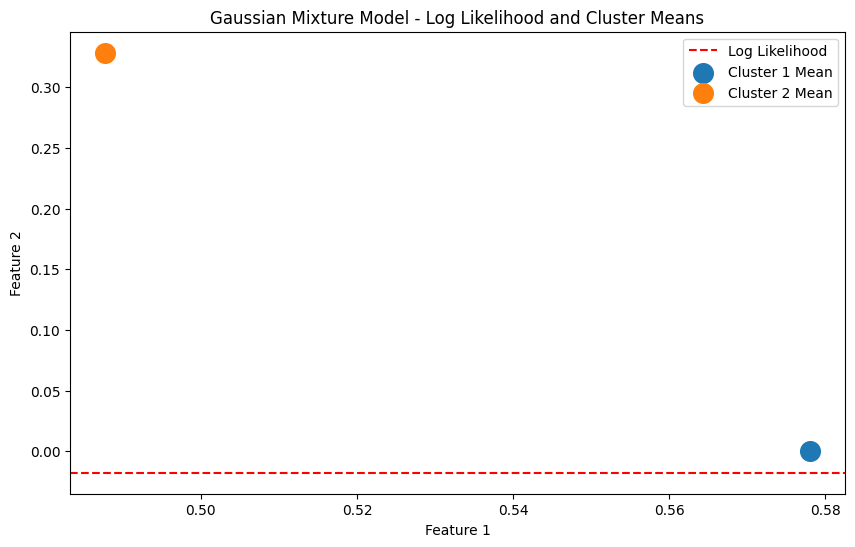

In [71]:
import seaborn as sns

# Example: Extract log likelihood values and cluster means
log_likelihood = gmm.score(X)  # Use the score method to get the log likelihood of the model
means = gmm.means_

# Create a plot
plt.figure(figsize=(10, 6))

# Plot the log likelihood
plt.axhline(y=log_likelihood, color='red', linestyle='--', label='Log Likelihood')

# Plot the means of the clusters (you may want to customize this depending on your needs)
for i, mean in enumerate(means):
    plt.scatter(mean[0], mean[1], label=f'Cluster {i + 1} Mean', s=200)

plt.title('Gaussian Mixture Model - Log Likelihood and Cluster Means')
plt.xlabel('Feature 1')  # Adjust according to your dataset's feature names
plt.ylabel('Feature 2')  # Adjust according to your dataset's feature names
plt.legend()
plt.show()


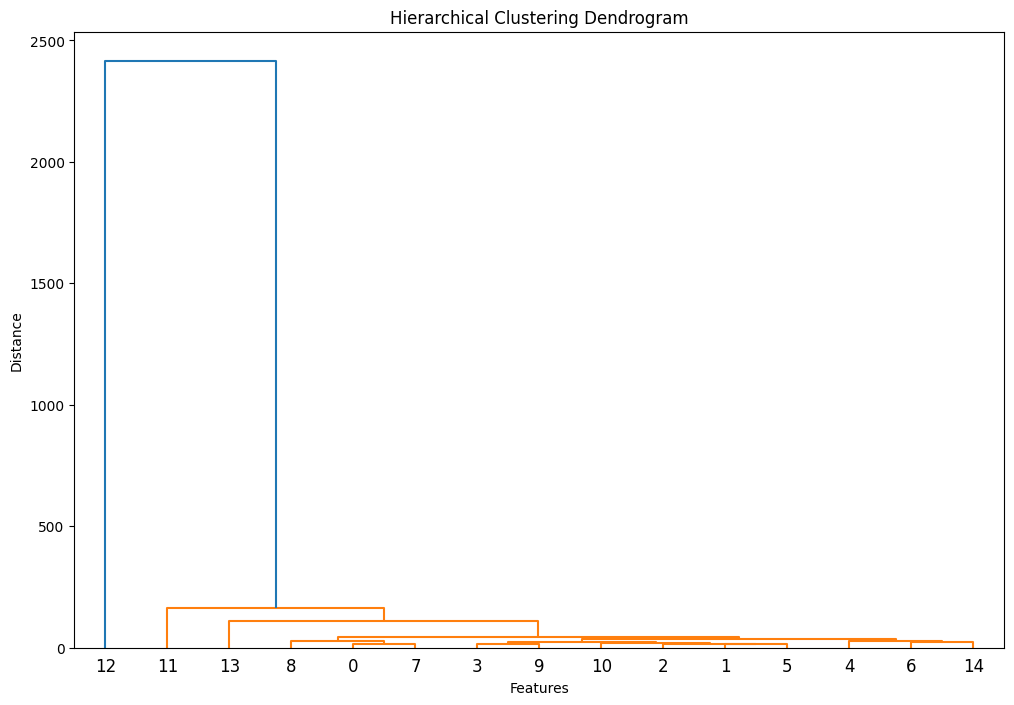

In [73]:
import scipy.cluster.hierarchy as sch

# Assuming 'mcd' DataFrame is loaded and 'MD.x' is defined as follows:
MD_x = mcd.iloc[:, :-1].values  # Assuming the last column is the target variable 'Like.n'

# Transpose the matrix to match R's behavior (hclust(dist(t(...))))
MD_x_transposed = MD_x.T

# Calculate the distance matrix
distance_matrix = sch.distance.pdist(MD_x_transposed)

# Perform hierarchical clustering
MD_vclust = sch.linkage(distance_matrix, method='ward')  # You can choose different methods

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(MD_vclust)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()


C:\Users\Mukhi2206\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


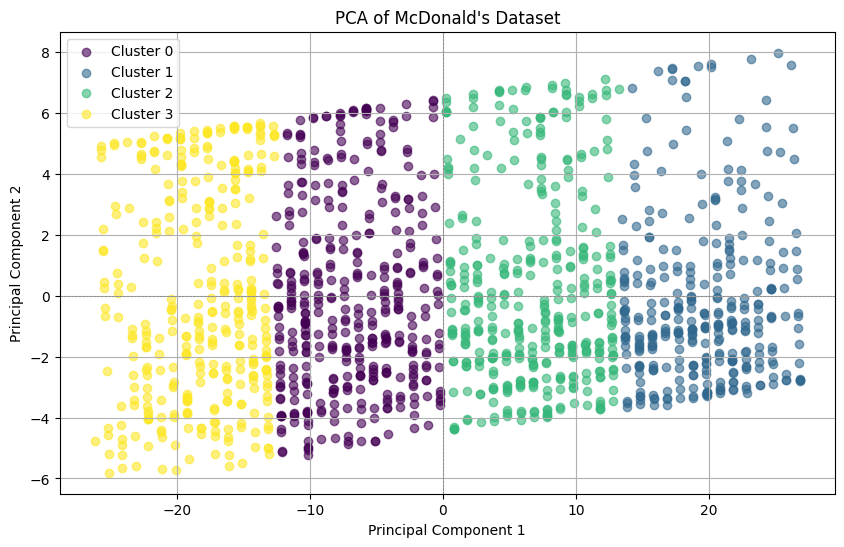

C:\Users\Mukhi2206\AppData\Local\Temp\ipykernel_23436\3701676278.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(0, 0, loading_df['PC1'][i]*3, loading_df['PC2'][i]*3,
C:\Users\Mukhi2206\AppData\Local\Temp\ipykernel_23436\3701676278.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loading_df['PC1'][i]*3.1, loading_df['PC2'][i]*3.1,


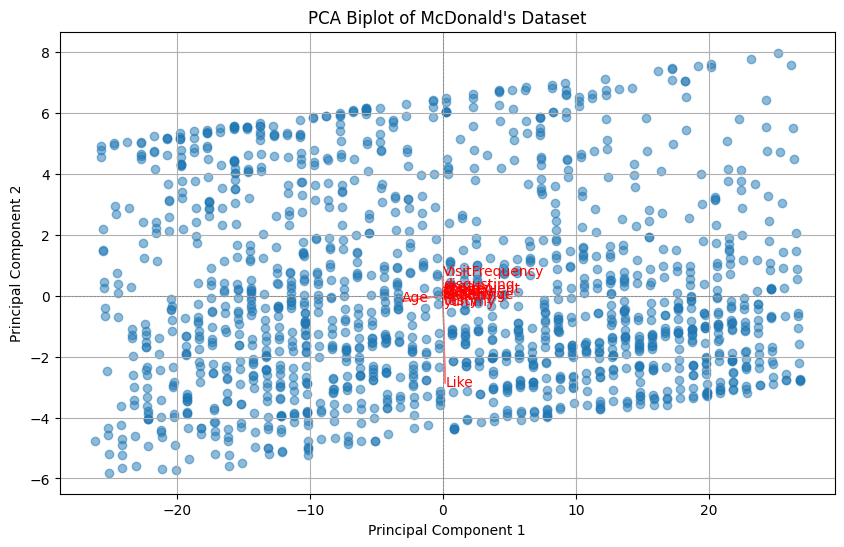

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assume 'mcd' DataFrame is already loaded and contains the data
MD_x = mcd.iloc[:, :-1].values  # Feature matrix, excluding the target variable

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Fit KMeans (assuming you have already done this)
kmeans = KMeans(n_clusters=4, random_state=1234)
MD_k4 = kmeans.fit_predict(MD_x)  # This is the cluster assignment

# Create a DataFrame for easier plotting
pca_df = pd.DataFrame(data=MD_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = MD_k4

# Plotting PCA with cluster assignments
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(set(MD_k4))))  # Color map for clusters

# Scatter plot of PCA components
for cluster in np.unique(MD_k4):
    plt.scatter(pca_df[pca_df['Cluster'] == cluster]['PC1'],
                pca_df[pca_df['Cluster'] == cluster]['PC2'],
                color=colors[cluster], label=f'Cluster {cluster}', alpha=0.6)

plt.title('PCA of McDonald\'s Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='grey', lw=0.5, ls='--')  # Add horizontal line at y=0
plt.axvline(0, color='grey', lw=0.5, ls='--')  # Add vertical line at x=0
plt.legend()
plt.grid()
plt.show()

# This will show the contribution of original features to the principal components
loading_scores = pca.components_.T
loading_df = pd.DataFrame(loading_scores, index=mcd.columns[:-1], columns=['PC1', 'PC2'])

# Create a biplot to visualize the feature contributions
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
for i in range(len(loading_df)):
    plt.arrow(0, 0, loading_df['PC1'][i]*3, loading_df['PC2'][i]*3, 
              color='r', alpha=0.5)
    plt.text(loading_df['PC1'][i]*3.1, loading_df['PC2'][i]*3.1, 
             loading_df.index[i], color='r')

plt.title('PCA Biplot of McDonald\'s Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.grid()
plt.show()


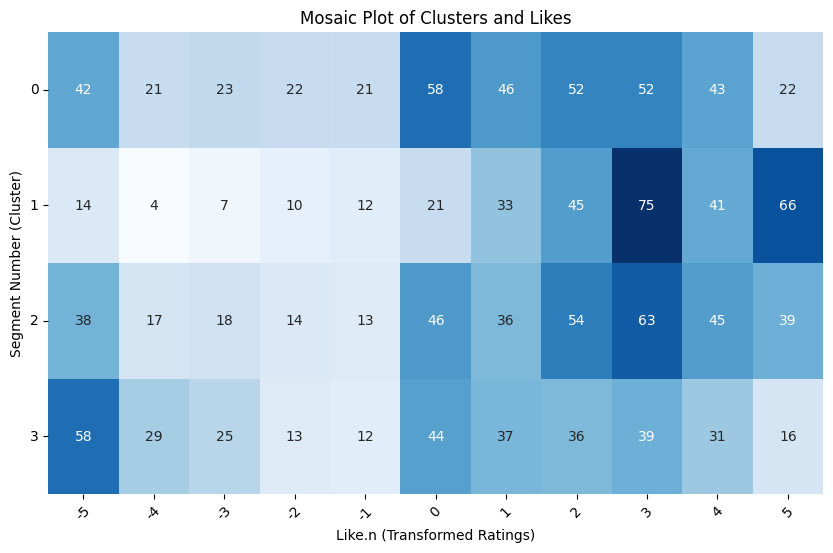

In [77]:

k4 = MD_k4  # Assuming this is the cluster assignment from KMeans
mcd['Cluster'] = k4  # Add cluster assignments to the DataFrame

# Create a contingency table
contingency_table = pd.crosstab(mcd['Cluster'], mcd['Like.n'])

# Plotting the mosaic plot using seaborn's heatmap as a workaround
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Mosaic Plot of Clusters and Likes')
plt.xlabel('Like.n (Transformed Ratings)')
plt.ylabel('Segment Number (Cluster)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.grid(False)
plt.show()


<Figure size 1000x600 with 0 Axes>

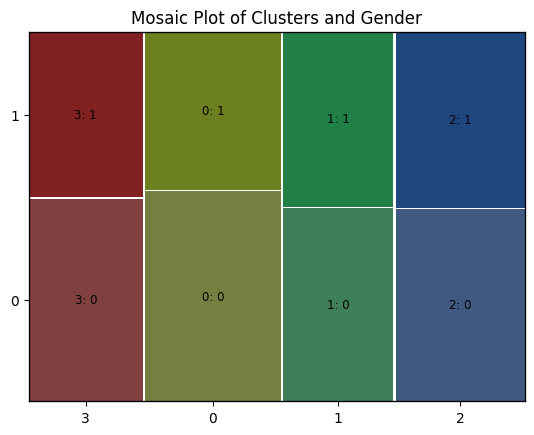

In [78]:
from statsmodels.graphics.mosaicplot import mosaic

mcd['Cluster'] = k4  # k4 should contain cluster assignments from your model

# Create a new DataFrame for the mosaic plot
mosaic_data = pd.DataFrame({'Cluster': mcd['Cluster'], 'Gender': mcd['Gender']})

# Create the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(mosaic_data, ['Cluster', 'Gender'], title='Mosaic Plot of Clusters and Gender', 
       labelizer=lambda k: f'{k[0]}: {k[1]}', 
       properties={'edgecolor': 'black', 'facecolor': 'lightblue'})
plt.show()


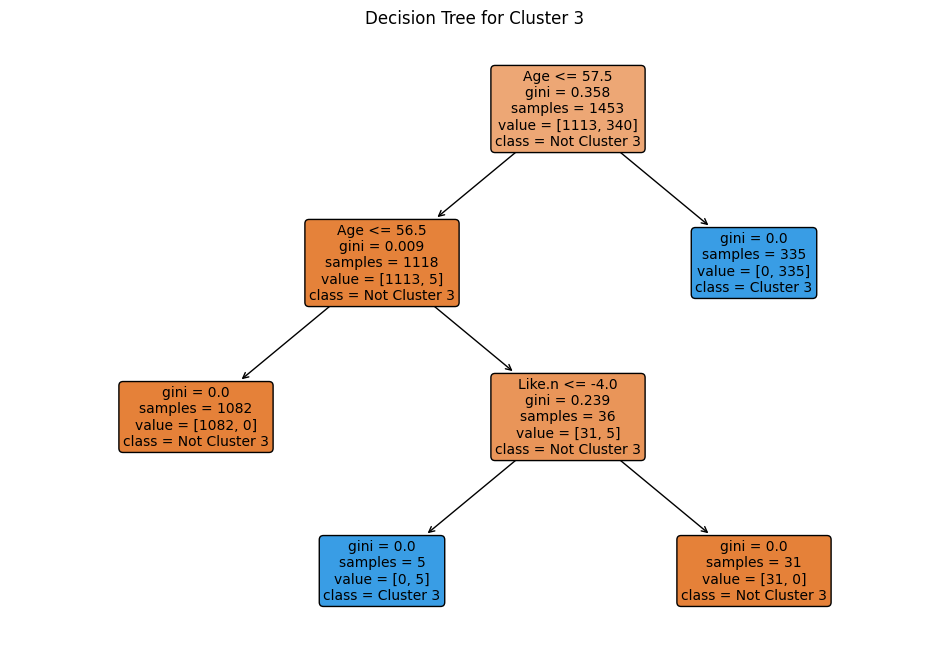

In [79]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

mcd['Cluster'] = k4  # k4 should contain cluster assignments from your model

# Create the feature matrix X and target variable y
X = mcd[['Like.n', 'Age', 'VisitFrequency', 'Gender']]
y = (mcd['Cluster'] == 3).astype(int)  # Convert to binary (1 if Cluster == 3, else 0)

# Fit a decision tree classifier
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=['Not Cluster 3', 'Cluster 3'], 
          filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree for Cluster 3')
plt.show()


In [80]:
mcd['Cluster'] = k4  # k4 should contain cluster assignments from your model

# Calculate the mean VisitFrequency for each cluster
visit = mcd.groupby('Cluster')['VisitFrequency'].mean()

# Display the mean VisitFrequency for each cluster
print(visit)


Cluster
0    1.838308
1    1.743902
2    1.744125
3    2.238235
Name: VisitFrequency, dtype: float64


In [81]:
mcd['Cluster'] = k4  # k4 should contain cluster assignments from your model

# Calculate the mean Like.n for each cluster
like = mcd.groupby('Cluster')['Like.n'].mean()

# Display the mean Like.n for each cluster
print(like)

Cluster
0    0.398010
1    2.143293
2    0.926893
3   -0.261765
Name: Like.n, dtype: float64
